In [1]:
# Import necessary packages
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the directory path
set_a_dir = './Bonn_data/set_a/'
set_b_dir = './Bonn_data/set_b/'
set_c_dir = './Bonn_data/set_c/'
set_d_dir = './Bonn_data/set_d/'
set_e_dir = './Bonn_data/set_e/'

In [2]:
# Loading the data

# Define labels
label_0 = 0 # Represent Non-Epileptic
label_1 = 1 # Represent Epileptic

def load_data():
    bonn_data = []
    files_num = 0
    for fname in tqdm(os.listdir(set_a_dir)):
        img = np.loadtxt(set_a_dir + fname)
        bonn_data.append([img, np.array(label_0)])
        files_num += 1

    for fname in tqdm(os.listdir(set_b_dir)):
        img = np.loadtxt(set_b_dir + fname)
        bonn_data.append([img, np.array(label_0)])
        files_num += 1    
    
    for fname in tqdm(os.listdir(set_c_dir)):
        img = np.loadtxt(set_c_dir + fname)
        bonn_data.append([np.array(img), np.array(label_1)])
        files_num += 1

    for fname in tqdm(os.listdir(set_d_dir)):
        img = np.loadtxt(set_d_dir + fname)
        bonn_data.append([np.array(img), np.array(label_1)])
        files_num += 1

    for fname in tqdm(os.listdir(set_e_dir)):
        img = np.loadtxt(set_e_dir + fname)
        bonn_data.append([np.array(img), np.array(label_1)])
        files_num += 1
        
    return bonn_data


bonn_data = load_data()
print(len(bonn_data), "files in total.")

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2194.75it/s]

500 files in total.


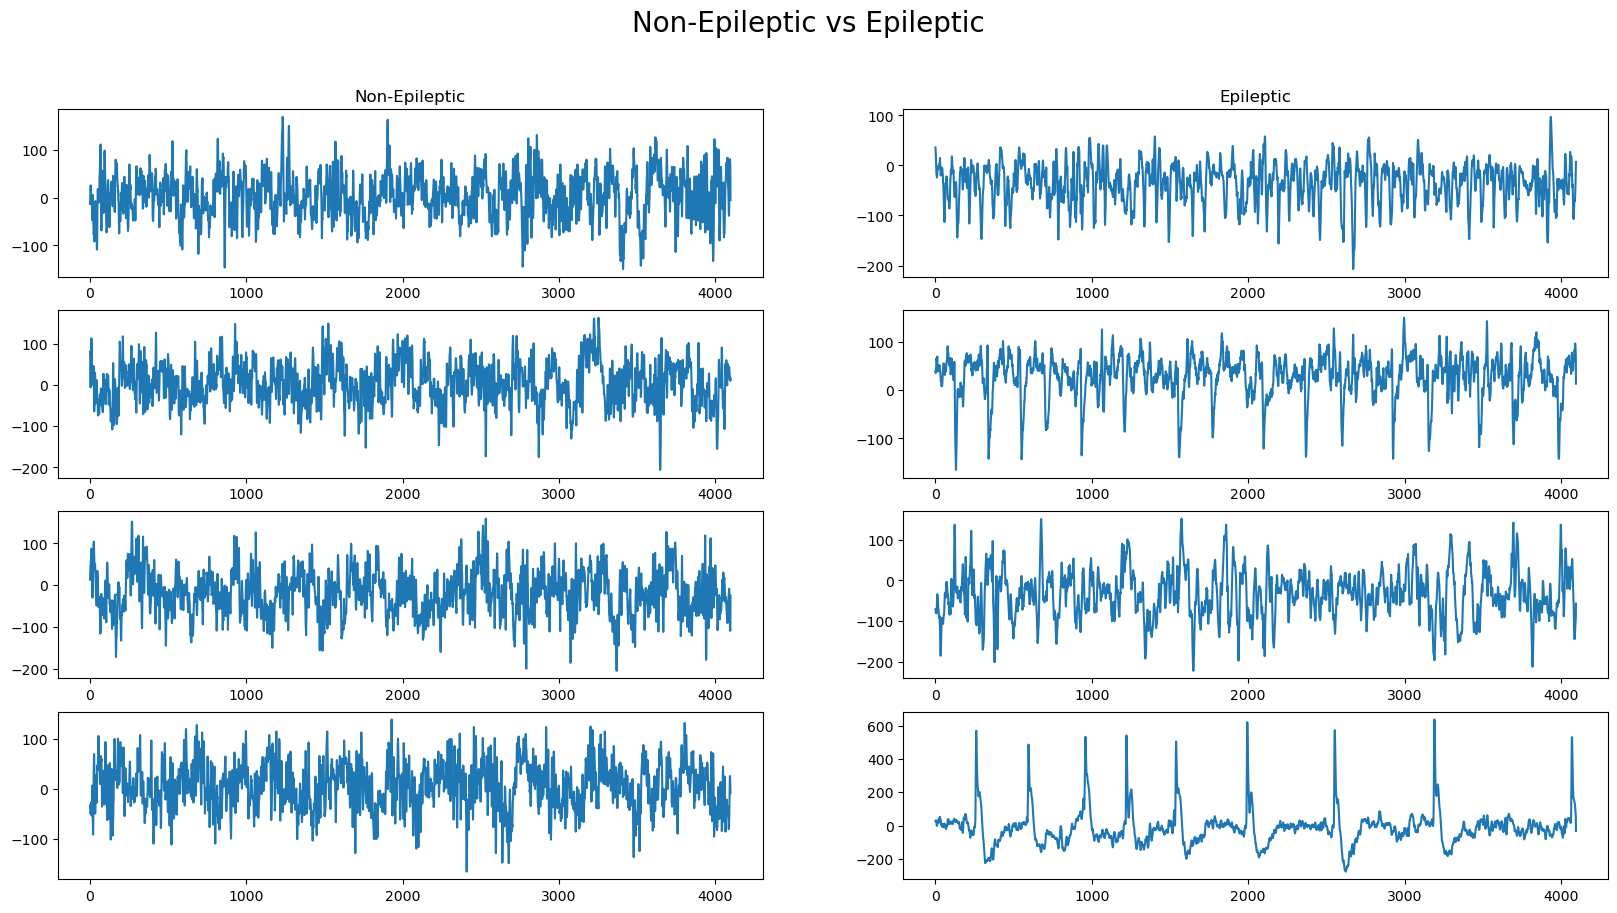

In [3]:
import random

mpl.rcParams['figure.figsize'] = (20,10)

fig = plt.figure()

samples_0 = np.empty((0, 4097), int)
while len(samples_0) < 4:
    curID = random.randint(0, len(bonn_data))
    if bonn_data[curID][1] == label_0:
        samples_0 = np.vstack((samples_0, bonn_data[curID][0]))
        
        
samples_1 = np.empty((0, 4097), int)
while len(samples_1) < 4:
    curID = random.randint(0, len(bonn_data))
    if bonn_data[curID][1] == label_1:
        samples_1 = np.vstack((samples_1, bonn_data[curID][0]))
        
for i in range(0, 4):
    plt.subplot(421 + i * 2)
    plt.plot(samples_0[i])
    plt.subplot(421 + i * 2 + 1)
    plt.plot(samples_1[i])

ax = plt.subplot(421)
ax.set_title("Non-Epileptic")
ax = plt.subplot(422)
ax.set_title("Epileptic")

fig.suptitle("Non-Epileptic vs Epileptic", fontsize=20)
plt.show()

In [4]:
# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffle the data
bonn_data = shuffle(bonn_data)

# Extract features and labels
X = np.array([i[0] for i in bonn_data])
y = np.array([i[1] for i in bonn_data])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
y_train = y_train.reshape(y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
y_test = y_test.reshape(y_test.shape[0], 1)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

# Given parameters
batch_size = 4
epoch_num = 20
hidden_size = 64
use_dropout=True

# Initialize the model
model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))

if use_dropout:
    model.add(Dropout(0.35))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())


history = model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epoch_num)

# List all ket of history
print(history.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
80/80 [==============================] - 34s 414ms/step - loss: 0.6801 - mae: 0.4713 - acc: 0.5750 - val_loss: 0.6289 - val_mae: 0.4519 

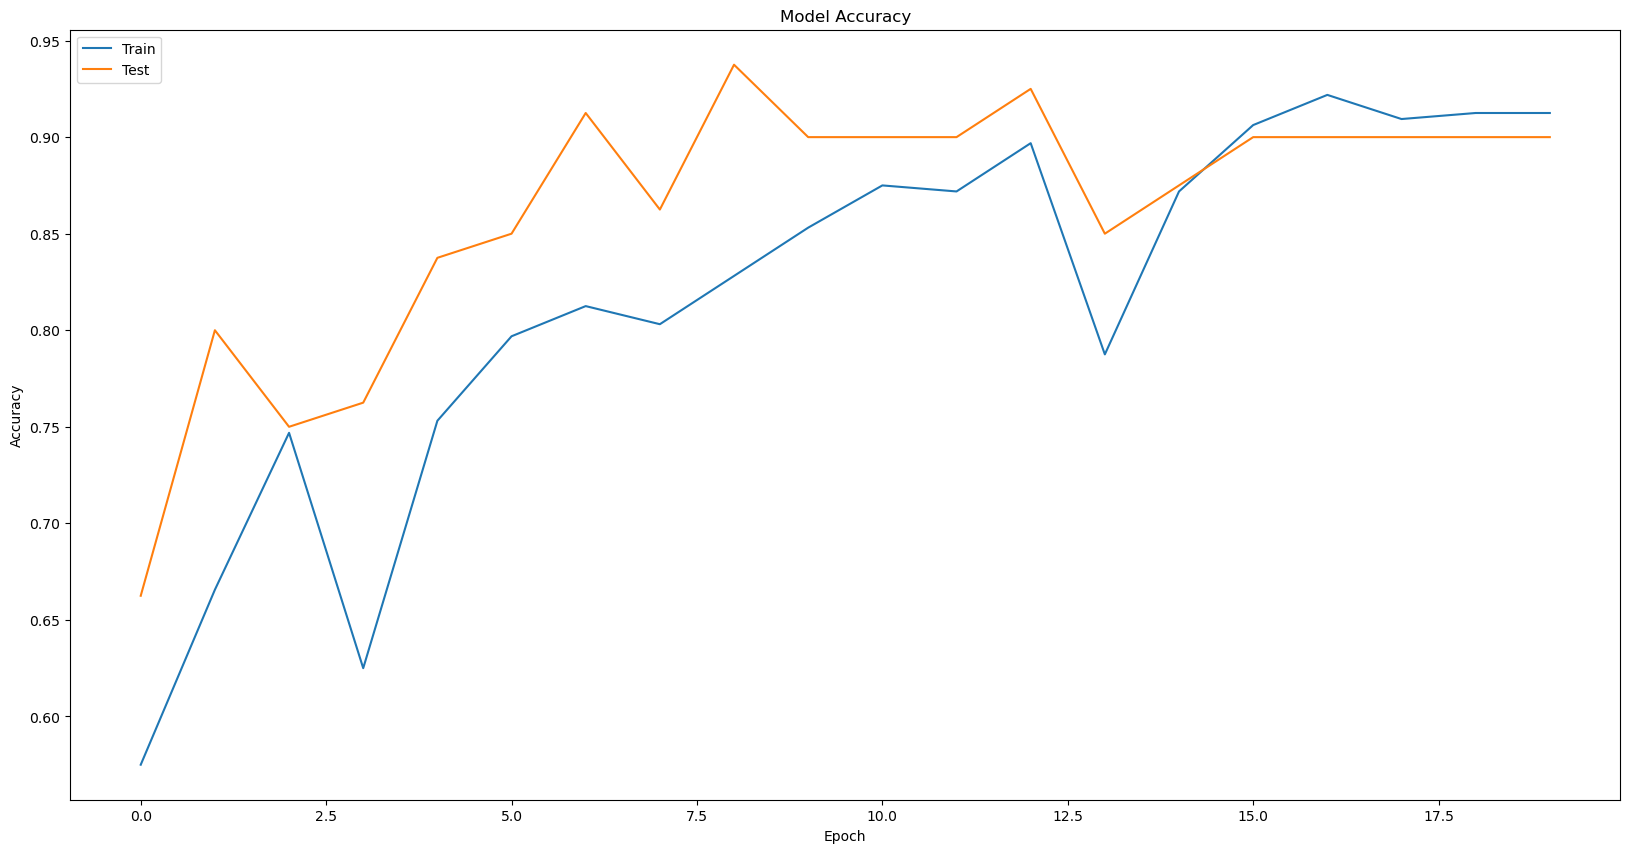

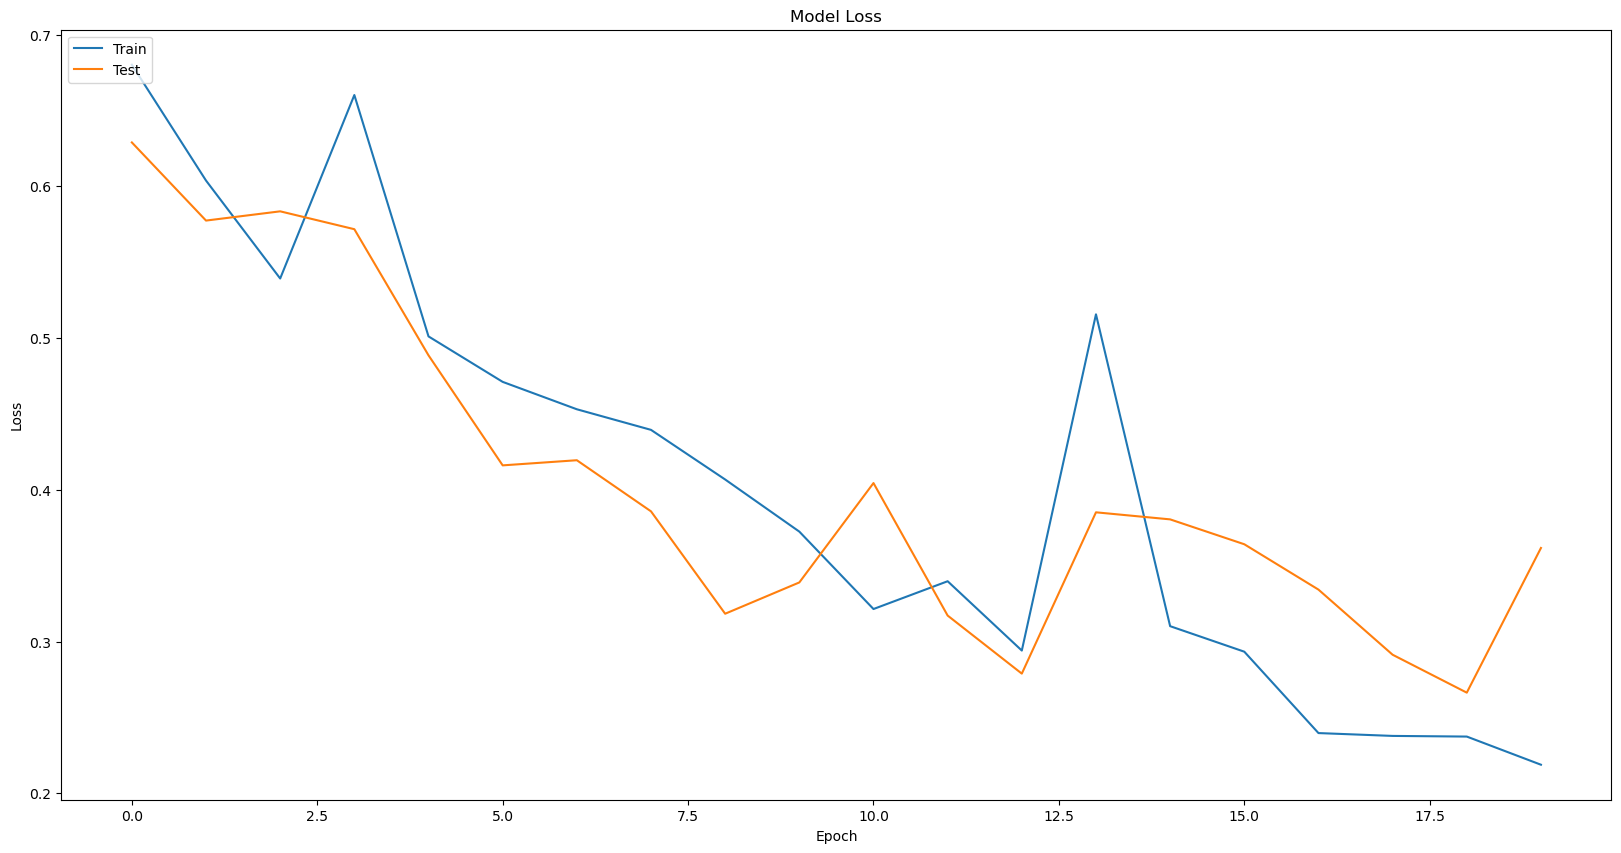

In [6]:
# Summarize history data for the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Summarize history data for the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [7]:
# Make Predictions
preds = model.predict(X_test)

# Convert predictions to binary labels (0 or 1)
threshold = 0.5
binary_preds = (preds > threshold).astype(int)

# Display some sample predictions
for i in range(10):
    print(f"True Label: {y_test[i]}, Predicted Label: {binary_preds[i][0]}, Probability: {preds[i][0]:.4f}")



4/4 [==============================] - 1s 193ms/step
True Label: [1], Predicted Label: 1, Probability: 0.5180
True Label: [0], Predicted Label: 0, Probability: 0.2901
True Label: [1], Predicted Label: 1, Probability: 0.9641
True Label: [1], Predicted Label: 1, Probability: 0.8964
True Label: [0], Predicted Label: 0, Probability: 0.1957
True Label: [0], Predicted Label: 0, Probability: 0.0201
True Label: [0], Predicted Label: 0, Probability: 0.0876
True Label: [1], Predicted Label: 1, Probability: 0.8976
True Label: [1], Predicted Label: 1, Probability: 0.9495
True Label: [0], Predicted Label: 1, Probability: 0.5026


In [8]:
# Evaluate Overall Model Performance
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(X_test, y_test, batch_size=batch_size)

print(f"Loss: {score[0]:.2f}")
print(f"Model Accuracy: {score[2] * 100:.2f} %")

print("\nClassification Report:")
print(classification_report(y_test, binary_preds))

25/25 [==============================] - 3s 101ms/step - loss: 0.4286 - mae: 0.2354 - acc: 0.8200
Loss: 0.43
Model Accuracy: 82.00 %

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        47
           1       0.84      0.81      0.83        53

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



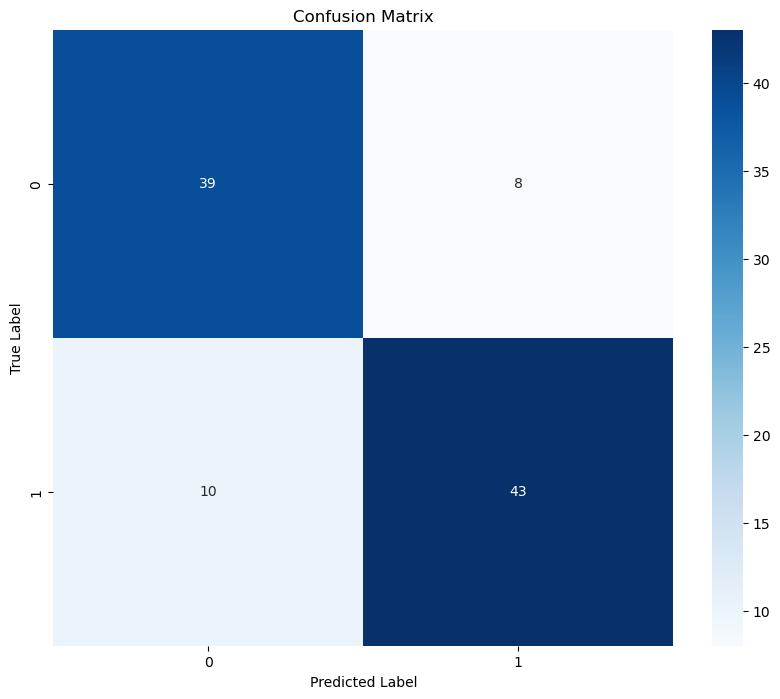

In [9]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix(y_test, binary_preds), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()